# Red Wine Quality Predictor

In this notebook, I practice analyzing data and creating a model to predict a wine's quality based on various features.

### Data Source

The wine data I'm looking at comes from the following source: https://archive.ics.uci.edu/ml/datasets/wine+quality.

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

### Data Set

This data set contains the following numeric variables (descriptions are paraphrased from https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/data):

- *fixed acidity*: Most acids found in wine are fixed
- *voltile acidity*: At high levels, voltile acidity leaves a vinegary taste
- *citric acid*: Adds freshness or flavor
- *residual sugar*: The amount of sugar left over after the wine ferments, measured in grams.
- *chlorides*: The amount of salt in the wine.
- *free sulfur dioxide*: The free form of SO2, which prevents microbial growth and wine oxidation.
- *total sulfur dioxide*: The free and bound forms of S02. At high amounts, this contributes to the nose and taste.
- *density*: The density of the wine. This varies based on alcohol and sugar contents.
- *pH*: On a scale of 0-14, where 0 is very acidic and 14 is very basic.
- *sulphates*: Acts as an antimicrobial and antioxidant by contributing to the S02 levels.
- *alcohol*: Percent alcohol of the wine.
- *quality*: (Based on sensory data), a scale of 0-10

In this exercise, I will try to predict the *quality* of the wine based on the other features in the dataset.

### Data Exploration

In [28]:
import pandas as pd

# Importing the data set and observing the first five entries
wine_dataframe = pd.read_csv('data/winequality-red.csv', sep=';')
wine_dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
# Separating the dataframe into y and X
y = wine_dataframe[['quality']]
X = wine_dataframe.drop(columns=['quality'])

In [30]:
import numpy as np

y_min = np.amin(y)
y_max = np.amax(y)
y_mean = np.mean(y)
y_median = np.median(y)
y_std = np.std(y)

print('For output variable quality: min %d, max %d, mean %d, median %d, standard deviation %d' % (y_min, y_max, y_mean, y_median, y_std))

For output variable quality: min 3, max 8, mean 5, median 6, standard deviation 0


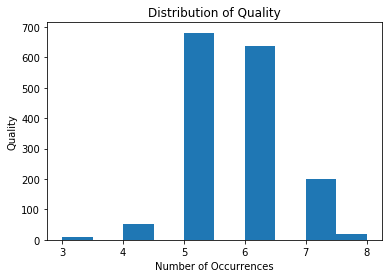

In [31]:
import matplotlib.pyplot as plt

plt.hist(y.values)
plt.title('Distribution of Quality')
plt.xlabel('Number of Occurrences')
plt.ylabel('Quality')
plt.show()

Clearly, there are far more occurrences of 5 and 6 ratings than any other value. It should also be noted that the range of values is 3-8, which is probably to be expected: it's rare to find a wine so awful that it deserves a 0 or 1, nor so good that it's a perfect 10.

Although the quality is ordinal, a lot of the data is focused around a 5 or 6 rating. Also, because of the discrete values associated with the quality, I find it's more appropriate to group wine qualities together and make a model that predicts whether wine is good or not. Particulary, we can consider a wine with a rating 6 or higher to be a good wine, and wine with a rating 5 or lower to be mediocre or bad.

I will start by splitting the data into two groups based on their rating.

In [32]:
wine_dataframe['quality'] = (wine_dataframe['quality'] >= 6).apply(lambda x: int(x))
wine_dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [33]:
y_grouped = wine_dataframe['quality']
X_grouped = wine_dataframe.drop(columns=['quality'])

We can explore the different values of features between good and bad wine to see if there are any notably defining features.

In [34]:
# For a given wine_df and feature, print out metrics
def print_metrics(feature, wine_df, df_label):
    _min = np.amin(wine_df[feature])
    _max = np.amax(wine_df[feature])
    _mean = np.mean(wine_df[feature])
    _std = np.std(wine_dataframe[feature])
    
    print('For %s %s: min %f, max %f, mean %f, standard deviation of original df %f' % (df_label, feature, _min, _max, _mean, _std))

In [35]:
good_wine_df = wine_dataframe[wine_dataframe['quality'] == 1]
bad_wine_df = wine_dataframe[wine_dataframe['quality'] == 0]

for col in list(X_grouped):
    print_metrics(col, good_wine_df, 'good')
    print_metrics(col, bad_wine_df, 'bad')
    print('')

For good fixed acidity: min 4.700000, max 15.600000, mean 8.474035, standard deviation of original df 1.740552
For bad fixed acidity: min 4.600000, max 15.900000, mean 8.142204, standard deviation of original df 1.740552

For good volatile acidity: min 0.120000, max 1.040000, mean 0.474146, standard deviation of original df 0.179004
For bad volatile acidity: min 0.180000, max 1.580000, mean 0.589503, standard deviation of original df 0.179004

For good citric acid: min 0.000000, max 0.780000, mean 0.299883, standard deviation of original df 0.194740
For bad citric acid: min 0.000000, max 1.000000, mean 0.237755, standard deviation of original df 0.194740

For good residual sugar: min 0.900000, max 15.400000, mean 2.535965, standard deviation of original df 1.409487
For bad residual sugar: min 1.200000, max 15.500000, mean 2.542070, standard deviation of original df 1.409487

For good chlorides: min 0.012000, max 0.415000, mean 0.082661, standard deviation of original df 0.047051
For ba

### Preprocess

Normalizing the data to deal with the wide range in features:

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = list(X_grouped.columns.values)

X_normalized = pd.DataFrame(data = X_grouped)
X_normalized[numerical] = scaler.fit_transform(X_grouped[numerical])
X_normalized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


### Naive Predictor

We can make a naive predictor. Looking at the number of occurences of each class of wine:

In [37]:
print('Number of good wines, %d, number of bad wines, %d' % (good_wine_df.shape[0], bad_wine_df.shape[0]))

Number of good wines, 855, number of bad wines, 744


There are more occurences of good wines than bad wines. Given that I'm not basing this on any previous model, my naive predictor will be to simply mark every wine as good. 

Ultimately, this model should help folks when buying wine. Because money is on the line, it's important that the wines we classify as good are truly good. We don't mind if some good wines are classified as bad, but we would rather not recommend bad wines as good and waste a user's money. Therefore, we want a **high precision** model. In that case, we can calculate the F-score with beta 0.5.

In [40]:
# recall = TP / (TP + FN)
# precision = TP / (TP + FP)

TP = good_wine_df.shape[0]
FN = 0 # Nothing is predicted to be bad
FP = bad_wine_df.shape[0]

recall = float(TP) / (TP + FN)
precision = float(TP) / (TP + FP)

f_score = (1 + 0.5**2) * ((precision * recall)/((0.5**2)*precision + recall))

print('F-score with beta 0.5 for the naive predictor is %f' % (f_score))

F-score with beta 0.5 for the naive predictor is 0.589574


The F-score for our naive predictor is 0.589. Not the best.

Starting with a decision tree, we can see if we get anything better

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score, make_scorer

# Split the data into 80% training and 20% testing sets, setting random state
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_grouped, test_size=0.2, random_state=42, shuffle=True)

# Create a f_beta_scorer and set beta to 0.5, because we want to learn towards a high precision model
scorer = make_scorer(fbeta_score, beta=0.5)

# Find some great hyperparameters, starting with arbitrarily set options
clf = DecisionTreeClassifier(random_state=42)
parameters = {'criterion': ['entropy', 'gini'], 'max_depth': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10]}

grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_normalized, y_grouped, None)
best_clf = grid_fit.best_estimator_

# Fit the model and check the fbeta_score
best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)

fbeta_score(y_test, y_pred, 0.5)


0.7442116868798236

In [42]:
# Parameters of the best model so far
grid_fit.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2}

Using these three hyperparameters in a grid search approach, we find that the best parameters with all features has an f_0.5 score of 0.744, which isn't the best but isn't a terrible first model. Certainly it's better than our naive predictor, which has an f_0.5 score of 0.589.